# Сравнение моделей

## Импорты и генерация данных

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
from statsmodels.regression.linear_model import OLS

In [2]:
X = np.random.randn(1000, 2)
w = np.array([1, 1])
y = np.dot(X, w) + np.random.randn(1000) * 0.1
noise = np.random.randn(1000)

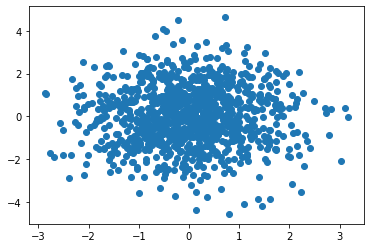

In [3]:
plt.scatter(noise, y)

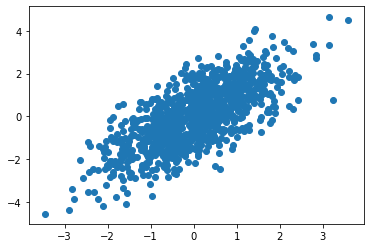

In [4]:
plt.scatter(X[:, 0], y)

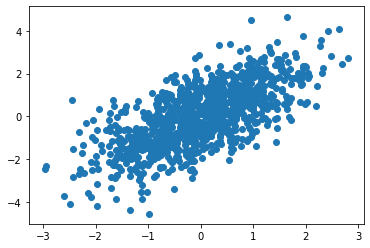

In [5]:
plt.scatter(X[:, 1], y)

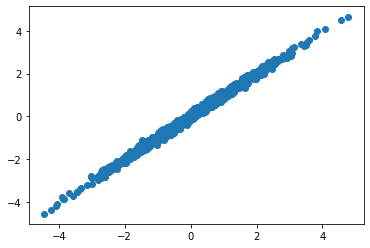

In [6]:
plt.scatter(np.sum(X, 1), y)

## Линейная регрессия

### Модель без шума из одного признака

#### Инициализация через аргументы

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
simple_model = OLS(y, X[:, 0]).fit()
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.519
Model:                            OLS   Adj. R-squared (uncentered):              0.518
Method:                 Least Squares   F-statistic:                              1077.
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                   6.97e-161
Time:                        18:25:30   Log-Likelihood:                         -1405.8
No. Observations:                1000   AIC:                                      2814.
Df Residuals:                     999   BIC:                                      2819.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9947      0.030     32.822      0.000       0.935       1.054
==============================================================================
Omnibus:                        4.202   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                3.695
Skew:                          -0.077   Prob(JB):                        0.158
Kurtosis:                       2.745   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Инициализация через формулы

In [9]:
simple_model = OLS.from_formula('y ~ x1 - 1', {'y' : y, 'x1' : X[:, 0]}).fit()
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.519
Model:                            OLS   Adj. R-squared (uncentered):              0.518
Method:                 Least Squares   F-statistic:                              1077.
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                   6.97e-161
Time:                        18:26:07   Log-Likelihood:                         -1405.8
No. Observations:                1000   AIC:                                      2814.
Df Residuals:                     999   BIC:                                      2819.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9947      0.030     32.822      0.000       0.935       1.054
==============================================================================
Omnibus:                        4.202   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                3.695
Skew:                          -0.077   Prob(JB):                        0.158
Kurtosis:                       2.745   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Модель шума

In [10]:
noise_model = OLS(y, noise).fit()
noise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.3708
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                       0.543
Time:                        18:26:12   Log-Likelihood:                         -1771.4
No. Observations:                1000   AIC:                                      3545.
Df Residuals:                     999   BIC:                                      3550.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0272      0.045      0.609      0.543      -0.060       0.115
==============================================================================
Omnibus:                        0.956   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                0.961
Skew:                          -0.075   Prob(JB):                        0.619
Kurtosis:                       2.980   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Модель без шума из двух признаков

In [11]:
complex_model = OLS.from_formula('y ~ x1 + x2 - 1', {'y' :  y, 'x1' : X[:, 0], 'x2' : X[:, 1]}).fit()
complex_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          8.924e+04
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                        0.00
Time:                        18:28:35   Log-Likelihood:                          824.43
No. Observations:                1000   AIC:                                     -1645.
Df Residuals:                     998   BIC:                                     -1635.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9976      0.003    306.052      0.000       0.991       1.004
x2             1.0015      0.003    292.165      0.000       0.995       1.008
==============================================================================
Omnibus:                        0.094   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.954   Jarque-Bera (JB):                0.045
Skew:                          -0.011   Prob(JB):                        0.978
Kurtosis:                       3.024   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Сравнение вложенных моделей

Каждый тест возвращает:

- значение статистики (так как, мы исследуем важность только одного признака, F-критерий эквивалентен критерию Стьюдента для двусторонней альтернативы)
- p-value
- разница в количестве степеней свободы между моделями

#### Критерий Фишера

In [12]:
complex_model.compare_f_test(simple_model)

(85360.53653114481, 0.0, 1.0)

#### Критерий отношения правдоподобия ($H_0$: равенство правдоподобий двух моделей)

In [13]:
complex_model.compare_lr_test(simple_model)

(4460.509662031321, 0.0, 1.0)

#### Критерий Бройша-Пагана (множителей Лагранжа)

In [14]:
complex_model.compare_lm_test(simple_model)

(988.4435281086539, 5.837688252039393e-217, 1.0)

Нулевая гипотеза об отсутствии влияния второго признака на целевую переменную отвергается

### Добавим шум

In [15]:
from statsmodels.regression.linear_model import OLS
complex_model2 = OLS.from_formula('y ~ x1 + x2 + noise - 1',
                                  {
                                      'y' : y,
                                      'noise' : noise,
                                      'x1' : X[:, 0],
                                      'x2' : X[:, 1]
                                  }).fit()
complex_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          5.944e+04
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                        0.00
Time:                        18:33:13   Log-Likelihood:                          824.48
No. Observations:                1000   AIC:                                     -1643.
Df Residuals:                     997   BIC:                                     -1628.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9975      0.003    305.854      0.000       0.991       1.004
x2             1.0015      0.003    292.024      0.000       0.995       1.008
noise          0.0011      0.003      0.324      0.746      -0.005       0.008
==============================================================================
Omnibus:                        0.091   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.956   Jarque-Bera (JB):                0.045
Skew:                          -0.012   Prob(JB):                        0.978
Kurtosis:                       3.022   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
complex_model2.compare_lm_test(complex_model)

(0.1053361374725469, 0.7455176687672396, 1.0)

In [17]:
complex_model2.compare_lm_test(noise_model)

(994.4381178642775, 1.1494932057325407e-216, 2.0)

In [20]:
complex_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          5.944e+04
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                        0.00
Time:                        18:35:13   Log-Likelihood:                          824.48
No. Observations:                1000   AIC:                                     -1643.
Df Residuals:                     997   BIC:                                     -1628.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9975      0.003    305.854      0.000       0.991       1.004
x2             1.0015      0.003    292.024      0.000       0.995       1.008
noise          0.0011      0.003      0.324      0.746      -0.005       0.008
==============================================================================
Omnibus:                        0.091   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.956   Jarque-Bera (JB):                0.045
Skew:                          -0.012   Prob(JB):                        0.978
Kurtosis:                       3.022   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
complex_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          8.924e+04
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                        0.00
Time:                        18:34:17   Log-Likelihood:                          824.43
No. Observations:                1000   AIC:                                     -1645.
Df Residuals:                     998   BIC:                                     -1635.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9976      0.003    306.052      0.000       0.991       1.004
x2             1.0015      0.003    292.165      0.000       0.995       1.008
==============================================================================
Omnibus:                        0.094   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.954   Jarque-Bera (JB):                0.045
Skew:                          -0.011   Prob(JB):                        0.978
Kurtosis:                       3.024   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
noise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.3708
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                       0.543
Time:                        18:35:22   Log-Likelihood:                         -1771.4
No. Observations:                1000   AIC:                                      3545.
Df Residuals:                     999   BIC:                                      3550.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0272      0.045      0.609      0.543      -0.060       0.115
==============================================================================
Omnibus:                        0.956   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                0.961
Skew:                          -0.075   Prob(JB):                        0.619
Kurtosis:                       2.980   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Выбор моделей: случай невложенных моделей

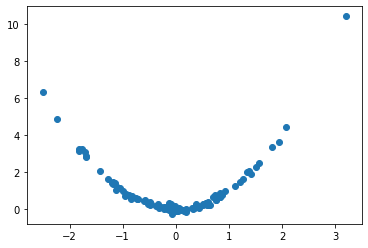

In [22]:
X = np.random.randn(100)
y = X**2 + np.random.randn(100) * 0.1
plt.scatter(X, y)

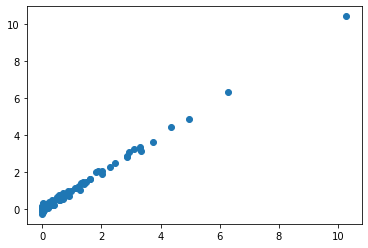

In [23]:
plt.scatter(X ** 2, y)

### Линейная модель

In [24]:
model1 = OLS(y, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.010
Method:                 Least Squares   F-statistic:                           0.001199
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                       0.972
Time:                        18:35:57   Log-Likelihood:                         -201.89
No. Observations:                 100   AIC:                                      405.8
Df Residuals:                      99   BIC:                                      408.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0063      0.183      0.035      0.972      -0.357       0.369
==============================================================================
Omnibus:                       95.702   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              959.234
Skew:                           3.174   Prob(JB):                    5.07e-209
Kurtosis:                      16.781   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Квадратичная модель

In [25]:
model2 = OLS(y, X ** 2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          2.957e+04
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                   2.04e-124
Time:                        18:36:00   Log-Likelihood:                          83.239
No. Observations:                 100   AIC:                                     -164.5
Df Residuals:                      99   BIC:                                     -161.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0007      0.006    171.953      0.000       0.989       1.012
==============================================================================
Omnibus:                        3.697   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.157   Jarque-Bera (JB):                3.024
Skew:                           0.380   Prob(JB):                        0.220
Kurtosis:                       3.384   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Предсказания моделей

In [26]:
y_predicted1 = model1.predict(X)
y_predicted2 = model2.predict(X ** 2)

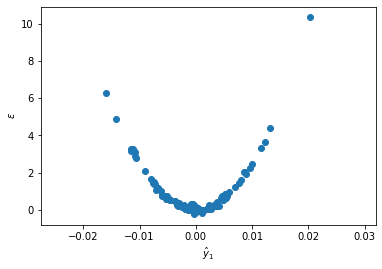

In [27]:
plt.scatter(y_predicted1, y - y_predicted1)
plt.xlabel('$\hat y_1$')
_ = plt.ylabel('$\epsilon$')

Text(0, 0.5, 'y')

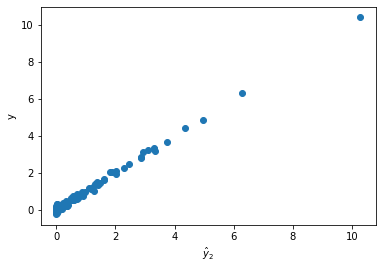

In [28]:
plt.scatter(y_predicted2, y)
plt.xlabel('$\hat y_2$')
plt.ylabel('y')

#### Критерий Давидсона-Маккиннона

In [33]:
data = {'y' : y, 'y1' : y_predicted1, 'y2': y_predicted2, 'X' : X, 'X2' : X ** 2}
model1_with_y_2 = OLS.from_formula('y ~ y2 + X', data=data).fit()
model2_with_y_1 = OLS.from_formula('y ~ y1 + X2', data=data).fit()

In [31]:
model1_with_y_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.046e+04
Date:                Tue, 07 Apr 2020   Prob (F-statistic):          5.07e-114
Time:                        18:41:47   Log-Likelihood:                 84.546
No. Observations:                 100   AIC:                            -163.1
Df Residuals:                      97   BIC:                            -155.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0176      0.013     -1.388      0.168      -0.043       0.008
y2             1.0053      0.007    144.583      0.000       0.992       1.019
X              0.0077      0.011      0.726      0.470      -0.013       0.029
==============================================================================
Omnibus:                        4.273   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                3.589
Skew:                           0.405   Prob(JB):                        0.166
Kurtosis:                       3.453   Cond. No.                         2.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model2_with_y_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.046e+04
Date:                Tue, 07 Apr 2020   Prob (F-statistic):          5.07e-114
Time:                        18:43:50   Log-Likelihood:                 84.546
No. Observations:                 100   AIC:                            -163.1
Df Residuals:                      97   BIC:                            -155.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0176      0.013     -1.388      0.168      -0.043       0.008
y1             1.2095      1.666      0.726      0.470      -2.097       4.516
X2             1.0060      0.007    144.583      0.000       0.992       1.020
==============================================================================
Omnibus:                        4.273   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                3.589
Skew:                           0.405   Prob(JB):                        0.166
Kurtosis:                       3.453   Cond. No.                         303.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Кодирование категориальных переменных

In [35]:
data = [1] * 10 + [2] * 7 + [3] * 5
np.random.shuffle(data)
data = np.array(data)
data

array([2, 2, 2, 1, 1, 2, 1, 3, 1, 1, 1, 3, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1])

### dummy

In [36]:
from patsy.contrasts import Treatment
levels = [1, 2, 3]
contrast = Treatment().code_without_intercept(levels)
print(contrast.matrix)

[[0. 0.]
 [1. 0.]
 [0. 1.]]


In [37]:
contrast.matrix[data - 1]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 0.]])

#### deviation

In [38]:
from patsy.contrasts import Sum
contrast = Sum().code_without_intercept(levels)
print(contrast.matrix)

[[ 1.  0.]
 [ 0.  1.]
 [-1. -1.]]


In [39]:
contrast.matrix[data - 1]

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [-1., -1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [-1., -1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [-1., -1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [-1., -1.],
       [ 0.,  1.],
       [-1., -1.],
       [ 1.,  0.]])

# Метод Бокса-Кокса

In [40]:
rs = np.random.RandomState(42)
y = rs.randn(100)
print(np.array(y > 1).sum())

11


Изменим хвост нормального распределения

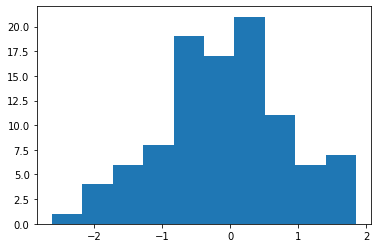

In [41]:
_ = plt.hist(y)

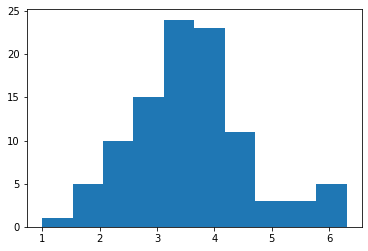

In [42]:
tails = (y) > 1
y[tails] *= 1.45

y = y - np.min(y) + 1
_ = plt.hist(y)

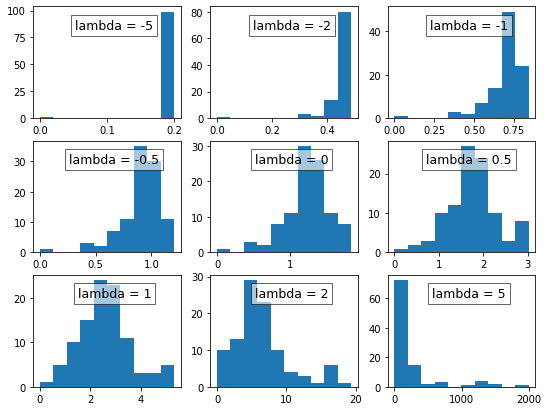

In [43]:
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
            horizontalalignment='center',
            transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=0.6),
            fontsize=12.5)
    return ax

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 7))
lambdas = [-5, -2, -1, -0.5, 0, 0.5, 1, 2, 5]
for i, l in enumerate(lambdas):
    axes[i // 3, i % 3].hist(st.boxcox(y, l))
    add_titlebox(axes[i // 3, i % 3], 'lambda = ' + str(l))

In [46]:
for l in np.arange(-2.0,  2.0, 0.1):    
    print(l, st.shapiro(st.boxcox(y, l)))

-2.0 (0.5157384872436523, 1.3918920521826514e-16)
-1.9 (0.5423719882965088, 3.914205953106718e-16)
-1.7999999999999998 (0.5695182085037231, 1.176184127205809e-15)
-1.6999999999999997 (0.5970176458358765, 3.779649898995926e-15)
-1.5999999999999996 (0.6246939897537231, 1.2990348000844337e-14)
-1.4999999999999996 (0.6523618698120117, 4.773070976546272e-14)
-1.3999999999999995 (0.6798292398452759, 1.8728607260962843e-13)
-1.2999999999999994 (0.7069024443626404, 7.833421411529429e-13)
-1.1999999999999993 (0.733389675617218, 3.4833631205183346e-12)
-1.0999999999999992 (0.7591072916984558, 1.6411877065691804e-11)
-0.9999999999999991 (0.7838813066482544, 8.156253450408713e-11)
-0.899999999999999 (0.8075541853904724, 4.252465324317001e-10)
-0.7999999999999989 (0.8299862146377563, 2.310562408069927e-09)
-0.6999999999999988 (0.8510535955429077, 1.2973270457905528e-08)
-0.5999999999999988 (0.8706591129302979, 7.453459005546392e-08)
-0.49999999999999867 (0.8887221217155457, 4.3268505578453187e-07)


In [47]:
bc, l = st.boxcox(y)
print(f'optimal lambda = {l}')
print('Box-Cox transformed array:')
print(bc)

optimal lambda = 0.6650524604546766
Box-Cox transformed array:
[2.34967566 1.94339332 2.44309507 3.35216838 1.87995815 1.87996907
 3.39720323 2.51640594 1.72167007 2.37816355 1.72579271 1.72421926
 2.18939193 0.64172332 0.79643666 1.65815816 1.34010116 2.23522256
 1.41563252 1.04230086 3.30595495 1.88552376 2.07759462 1.03274647
 1.67046012 2.10556927 1.23895715 2.2739625  1.63172649 1.84160362
 1.63098887 3.61319828 2.0250636  1.30744761 2.54991976 1.18710261
 2.16831071 0.60275787 1.1064171  2.1606511  2.49873321 2.14435529
 1.95826919 1.8353102  0.99125048 1.5488415  1.72768336 2.97016857
 2.25376379 0.76555632 2.24143736 1.77887738 1.57881497 2.42091346
 2.94826921 2.61563878 1.4646879  1.82988228 2.24597007 2.64224134
 1.71506208 1.91211366 1.27185281 1.20544939 2.54383731 3.21721317
 1.98688198 2.92518453 2.26511521 1.60092878 2.26496386 3.3642179
 2.01051797 3.38554503 0.         2.5495299  2.09019124 1.83671277
 2.09322992 0.57914852 1.88957655 2.26226699 3.31583573 1.68835848


## Гетероскедастичность

1.0


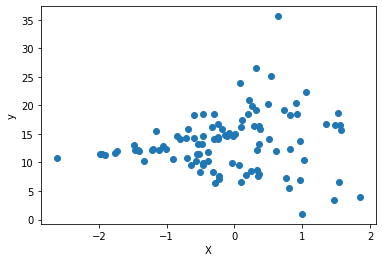

In [48]:
rs = np.random.RandomState(42)
X = rs.randn(100)
X.sort()
error = rs.randn(100) * 0.1 * np.arange(100)
y = X + error
y = y - np.min(y) + 1
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
print(y.min())

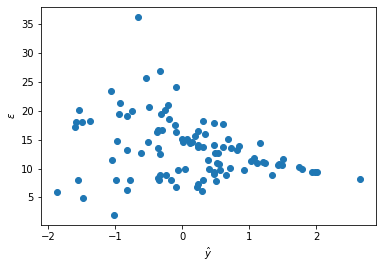

In [49]:
model = OLS(y, X).fit()
predicted = model.predict(X)
plt.scatter(predicted, y - predicted)
plt.xlabel('$\hat y$')
_ = plt.ylabel('$\epsilon$')

### Преобразование Бокса-Кокса вручную

In [50]:
def W(y, lam):
    return np.log(y) if lam == 0 else (y**lam - 1) / lam

И проверим

In [51]:
for l in [-2, -1, -0.5, 0, 0.5, 1, 2]:
    print(np.sum(W(y, l) - st.boxcox(y, l)))

-5.551115123125783e-17
2.220446049250313e-16
-1.3322676295501878e-15
0.0
-7.105427357601002e-15
-1.509903313490213e-14
-4.760636329592671e-13


35.61563235597085


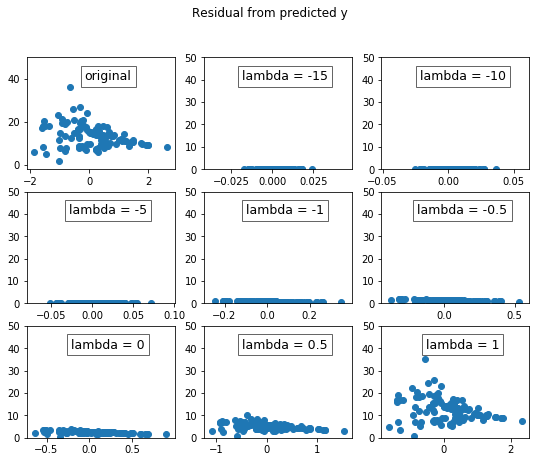

In [52]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 7))
fig.suptitle('Residual from predicted y')

model = OLS(y, X).fit()
predicted = model.predict(X)
axes[0, 0].scatter(predicted, y - predicted)
axes[0, 0].set_ylim((-2, 50))
add_titlebox(axes[0, 0], 'original')
print(max(y))
    
lams = [-15, -10, -5, -1, -0.5, 0, 0.5, 1]
for i, l in enumerate(lams):
    i += 1
    model = OLS(W(y, l), X).fit()
    predicted = model.predict(X)
    axes[i // 3, i % 3].scatter(predicted, W(y, l) - predicted)
    add_titlebox(axes[i // 3, i % 3], 'lambda = ' + str(l))
    axes[i // 3, i % 3].set_ylim((0, 50))

-5.0

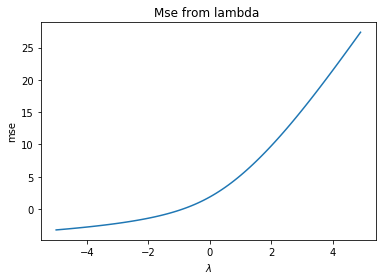

In [53]:
lams = np.arange(-5, 5, 0.1)
r = []
for l in lams:
    model = OLS(W(y, l), X).fit()
    r.append(np.log(model.mse_resid))
plt.plot(lams, r)
plt.xlabel('$\lambda$')
plt.ylabel('mse')
plt.title('Mse from lambda ')
lams[np.argmin(r)]

### Before

In [54]:
model = OLS(y, X).fit()
print(model.mse_resid)

209.91252202039055


In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.006
Method:                 Least Squares   F-statistic:                             0.4038
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                       0.527
Time:                        19:00:00   Log-Likelihood:                         -408.73
No. Observations:                 100   AIC:                                      819.5
Df Residuals:                      99   BIC:                                      822.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.0122      1.593     -0.635      0.527      -4.173       2.148
==============================================================================
Omnibus:                       24.587   Durbin-Watson:                   0.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.563
Skew:                           1.053   Prob(JB):                     1.56e-09
Kurtosis:                       5.302   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### After

In [58]:
bc, l = st.boxcox(y)
model = OLS(bc, X).fit()
print(l, model.mse_resid)

0.6590350588973163 50.53390977431041


In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                             0.7636
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                       0.384
Time:                        19:00:16   Log-Likelihood:                         -337.52
No. Observations:                 100   AIC:                                      677.0
Df Residuals:                      99   BIC:                                      679.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6829      0.782     -0.874      0.384      -2.234       0.868
==============================================================================
Omnibus:                        8.569   Durbin-Watson:                   0.172
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.476
Skew:                           0.587   Prob(JB):                       0.0144
Kurtosis:                       3.809   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
model = OLS(W(y, -5), X).fit()
print(model.mse_resid)

0.039362468177660585


In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.016
Model:                            OLS   Adj. R-squared (uncentered):              0.006
Method:                 Least Squares   F-statistic:                              1.595
Date:                Tue, 07 Apr 2020   Prob (F-statistic):                       0.210
Time:                        19:00:30   Log-Likelihood:                          20.356
No. Observations:                 100   AIC:                                     -38.71
Df Residuals:                      99   BIC:                                     -36.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0275      0.022     -1.263      0.210      -0.071       0.016
==============================================================================
Omnibus:                       57.296   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              331.591
Skew:                          -1.737   Prob(JB):                     9.91e-73
Kurtosis:                      11.217   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

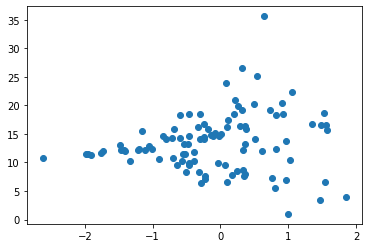

In [64]:
plt.scatter(X, y)

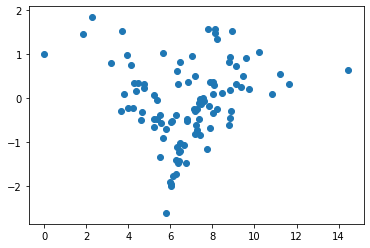

In [68]:
plt.scatter(st.boxcox(y)[0], X)

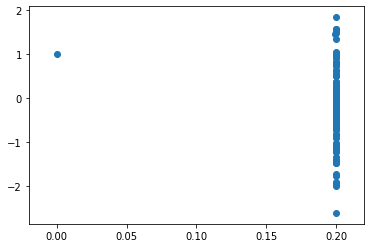

In [66]:
plt.scatter(W(y, -5), X)